In [240]:
import pandas as pd
import numpy as np

salary_data = pd.read_csv("Salary_Data.csv")
salary_data_orig = salary_data.copy()
print(salary_data.shape)

(6704, 6)


In [241]:
X_col_num = ['Age', 'Years of Experience']
X_col_cat = ['Gender', 'Education Level']
X_cols = X_col_num + X_col_cat
y_col = 'Salary'

In [242]:
from sklearn.impute import SimpleImputer

X_num = salary_data[X_col_num]
X_num.fillna(X_num.mean())
X_num

,Age,Years of Experience
0,32.0,5.0
1,28.0,3.0
2,45.0,15.0
3,36.0,7.0
4,52.0,20.0
...,...,...
6699,49.0,20.0
6700,32.0,3.0
6701,30.0,4.0
6702,46.0,14.0


In [243]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

num_pl = make_pipeline(SimpleImputer(strategy='mean'), 
                       StandardScaler())
num_pl.set_params(standardscaler=MinMaxScaler())
num_pl.fit_transform(X_num)

array([[0.26829268, 0.14705882],
       [0.17073171, 0.08823529],
       [0.58536585, 0.44117647],
       ...,
       [0.2195122 , 0.11764706],
       [0.6097561 , 0.41176471],
       [0.12195122, 0.02941176]])

In [244]:
X_cat = salary_data[X_col_cat]
X_cat

,Gender,Education Level
0,Male,Bachelor's
1,Female,Master's
2,Male,PhD
3,Female,Bachelor's
4,Male,Master's
...,...,...
6699,Female,PhD
6700,Male,High School
6701,Female,Bachelor's Degree
6702,Male,Master's Degree


In [245]:
from sklearn.preprocessing import OneHotEncoder

cat_pl = make_pipeline(SimpleImputer(strategy='most_frequent'),
                       OneHotEncoder(sparse_output =False))
cat_pl.fit_transform(X_cat)


array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [246]:
from sklearn.compose import ColumnTransformer
data_pl = ColumnTransformer([
    ('num_pl', SimpleImputer(strategy='mean'), X_col_num),
    ('cat_pl', cat_pl, X_col_cat)
])
pd.DataFrame(data_pl.fit_transform(salary_data))

,0,1,2,3,4,5,6,7,8,9,10,11
0,32.0,5.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,28.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,45.0,15.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,36.0,7.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,52.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6699,49.0,20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6700,32.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6701,30.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6702,46.0,14.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [247]:
# 第一步：取得cat_pl管道器
data_pl.named_transformers_['cat_pl']

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder', OneHotEncoder(sparse_output=False))])

In [248]:
# 第二步：取得onehotencoder欄位對應結果
data_pl.named_transformers_['cat_pl'].\
named_steps['onehotencoder'].get_feature_names_out()

array(['x0_Female', 'x0_Male', 'x0_Other', "x1_Bachelor's",
       "x1_Bachelor's Degree", 'x1_High School', "x1_Master's",
       "x1_Master's Degree", 'x1_PhD', 'x1_phD'], dtype=object)

In [249]:
# 你如何知道管道器裡的轉換器名稱呢？make_pipeline會自動小寫轉換器的名稱當索引鍵。
# 如果還是不確定就用named_steps.keys()列出所有的索引鍵值
data_pl.named_transformers_['cat_pl'].named_steps.keys()

dict_keys(['simpleimputer', 'onehotencoder'])

In [250]:
# 第三步：將所有欄位整理到DataFrame裡
X_col_cat_oh = data_pl.named_transformers_['cat_pl'].\
named_steps['onehotencoder'].get_feature_names_out(X_col_cat)
columns = X_col_num + X_col_cat_oh.tolist()
print('整合後的欄位資料：',columns)
pd.DataFrame(data_pl.fit_transform(salary_data), columns=columns)

整合後的欄位資料： ['Age', 'Years of Experience', 'Gender_Female', 'Gender_Male', 'Gender_Other', "Education Level_Bachelor's", "Education Level_Bachelor's Degree", 'Education Level_High School', "Education Level_Master's", "Education Level_Master's Degree", 'Education Level_PhD', 'Education Level_phD']


,Age,Years of Experience,Gender_Female,Gender_Male,Gender_Other,Education Level_Bachelor's,Education Level_Bachelor's Degree,Education Level_High School,Education Level_Master's,Education Level_Master's Degree,Education Level_PhD,Education Level_phD
0,32.0,5.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,28.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,45.0,15.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,36.0,7.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,52.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6699,49.0,20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6700,32.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6701,30.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6702,46.0,14.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [251]:
# 到目前為止我們所學習到的機器演算法都能有相當不錯的預測結果，但始終可惜的是，我們並不曉得這些演算法是如何做預測的，
# 它的判斷準則又是什麼？對人類而言，我們想知道的不僅是結果，更想知道判斷的準則是什麼。這種可以內化和推理的知識，
# 可以幫助我們解決未來類似的問題。機器學習裡能夠產生判斷準則的演算法叫做決策樹。在本章我們就要介紹這個神奇的演算法。

# 什麼是決策樹呢？它就像我們的思維過程。用鐵達尼號的資料來說明，我們想知道誰會存活下來。它的第一個判斷條件可能是性別，
# 因為用性別來預測最可能知道誰會存活下來。當用性別將樣本分成兩個族群之後，再選出下一個判斷條件。整個判斷流程就構成所謂的決策樹(因為長得像樹)，
# 也就是決策的流程。因此在本章，我們不僅會有預測結果，更要繪製出所謂的決策樹。``
!wget "https://www.wfonts.com/download/data/2014/06/01/simhei/simhei.zip"
!unzip "simhei.zip"
!rm "simhei.zip"
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r'SimHei.ttf')


def plot_chinese(ax):
    labels = ax.get_xticklabels()+ax.legend().texts+[ax.title]+[ax.xaxis.get_label()]
    for label in labels :
        label.set_fontproperties(myfont)

'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,
operable program or batch file.


In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

X_col_num = ['Age', 'Years of Experience','Salary']
X_col_cat = ['Gender']
X_cols = X_col_num + X_col_cat
y_col = 'Education Level'

X = salary_data_orig[X_cols]
y = salary_data_orig[y_col]

In [253]:
# 找出 y 中含有 NaN 的索引
nan_indexes = y[y.isnull()].index

# 丟棄 y 中含有 NaN 的行，同時也丟棄對應的 X 行
y.drop(nan_indexes, inplace=True)
X.drop(nan_indexes, inplace=True)

C:\Users\11706\AppData\Local\Temp\ipykernel_7164\884010895.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(nan_indexes, inplace=True)


In [254]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.33, random_state=42)
salary_data_orig.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [255]:
print(y.isnull().sum())

0


In [256]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
num_pl = make_pipeline(
    SimpleImputer(strategy='median')
)
cat_pl = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(sparse_output=False)
)
data_pl = ColumnTransformer([
    ('num_pl', num_pl, X_col_num),
    ('cat_pl', cat_pl, X_col_cat)
])
data_pl.fit_transform(X_train)[:1]

array([[2.9e+01, 4.0e+00, 7.0e+04, 0.0e+00, 1.0e+00, 0.0e+00]])

In [257]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
model_pl_tree = make_pipeline(data_pl,
                              DecisionTreeClassifier(random_state=42))
model_pl_tree.fit(X_train, y_train)
y_pred = model_pl_tree.predict(X_train)
print('正確率：', accuracy_score(y_train, y_pred).round(2))
print('混亂矩陣')
print(confusion_matrix(y_train, y_pred))

正確率： 0.97
混亂矩陣
[[ 509    3    5    0    2    0    0]
 [   6 1513    1    1   13    5    0]
 [   4   17  259    0    1    0    0]
 [   2    4    0  158    1    2    0]
 [   8   30    0    0 1012    6    0]
 [   1    2    0    1   12  910    0]
 [   0    0    0    0    0    0    1]]


In [258]:
y_pred = model_pl_tree.predict(X_test)
print('正確率：', accuracy_score(y_test, y_pred).round(2))
print('混亂矩陣')
print(confusion_matrix(y_test, y_pred))

正確率： 0.89
混亂矩陣
[[213  12   2   2   4   4]
 [  4 670   8   0  33  13]
 [  5  18 141   0   2   1]
 [  6   9   0  93   6   7]
 [ 11  35   1   1 446  23]
 [  5   7   1   7  25 397]]


In [259]:
model_pl_tree = make_pipeline(
    data_pl,
    DecisionTreeClassifier(max_depth=4, random_state=42)
)
model_pl_tree.fit(X_train, y_train)
print('「訓練集」的正確率：', model_pl_tree.score(X_train, y_train).round(2))
print('「測試集」的正確率：', model_pl_tree.score(X_test, y_test).round(2))

「訓練集」的正確率： 0.65
「測試集」的正確率： 0.6


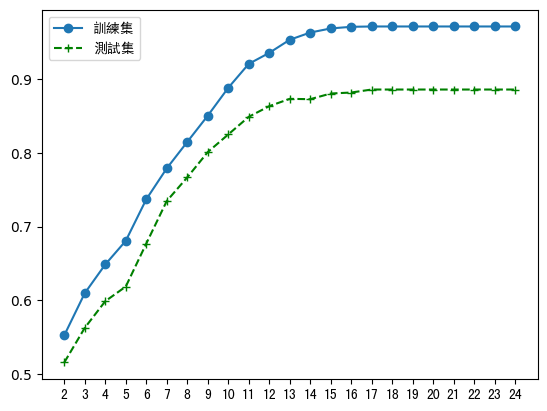

In [260]:
acc_train = []
acc_test = []
n_depth = range(2,25)
for n in n_depth:
    model_pl_tree = make_pipeline(
        data_pl,
        DecisionTreeClassifier(max_depth=n, random_state=42)
    )
    model_pl_tree.fit(X_train, y_train)
    acc_train.append(model_pl_tree.score(X_train, y_train))
    acc_test.append(model_pl_tree.score(X_test, y_test))
# 繪圖開始

plt.plot(n_depth, acc_train, marker='o', label='訓練集')
plt.plot(n_depth, acc_test, c='green',
         marker='+', ls='--', label='測試集')
plt.xticks(n_depth, n_depth)
plt.legend()
ax = plt.gca()
plot_chinese(ax)

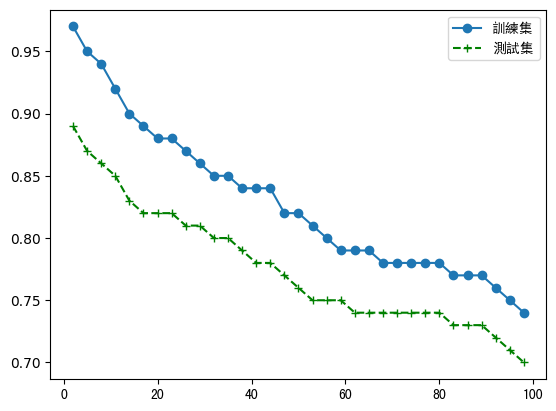

In [261]:
acc_train = []
acc_test = []
n_range = range(2,100,3)
for n in n_range:
    model_pl_tree = make_pipeline(data_pl,
                                  DecisionTreeClassifier(random_state=42, min_samples_split=n))
    model_pl_tree.fit(X_train, y_train)
    acc_train.append(model_pl_tree.score(X_train, y_train).round(2))
    acc_test.append(model_pl_tree.score(X_test, y_test).round(2))
plt.plot(n_range, acc_train, marker='o', label='訓練集')
plt.plot(n_range, acc_test, c='green', marker='+', ls='--', label='測試集')
plt.legend()
ax = plt.gca()
plot_chinese(ax)

In [262]:
model_pl_tree = make_pipeline(
    data_pl,
    DecisionTreeClassifier(max_depth=4, random_state=42)
)
model_pl_tree.fit(X_train, y_train)
tree = model_pl_tree.named_steps['decisiontreeclassifier']
feature_importance = tree.feature_importances_.round(3)
feature_importance

array([0.125, 0.184, 0.673, 0.018, 0.   , 0.   ])

In [263]:
print(f'數值型特徵值{X_col_num}')
print(f'類別型特徵值{X_col_cat}')
cat_pl = data_pl.named_transformers_['cat_pl']
oh_cols = cat_pl.named_steps['onehotencoder'].\
get_feature_names_out(X_col_cat)
print(f'獨熱編碼後的特徵值。{oh_cols}')
cols = X_col_num + oh_cols.tolist()
print(f'所有欄位{cols}')

數值型特徵值['Age', 'Years of Experience', 'Salary']
類別型特徵值['Gender']
獨熱編碼後的特徵值。['Gender_Female' 'Gender_Male' 'Gender_Other']
所有欄位['Age', 'Years of Experience', 'Salary', 'Gender_Female', 'Gender_Male', 'Gender_Other']


In [264]:
pd.DataFrame(feature_importance, index=cols, columns=['係數']).\
sort_values(by='係數', ascending=False)

,係數
Salary,0.673
Years of Experience,0.184
Age,0.125
Gender_Female,0.018
Gender_Male,0.000
Gender_Other,0.000
